# Heart Disease Diagnostic Analysis

In [1]:
#Importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,
sns.set_style('whitegrid')

In [4]:
# Extracting CSV dataset using pandas 

df = pd.read_csv("Heart Disease data old.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
# all columns in dataset
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
#checking null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
print(df.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

In [7]:
target = df.groupby('target').size()
target

target
0    499
1    526
dtype: int64

In [6]:
# convert numerical data and categorical data
def heart_disease(row):
    if row==0:
        return 'Absence'
    else:
        return 'Presence'

In [7]:
# add new column in our dataset
df['Heart_Disease']=df['target'].apply(heart_disease)
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,Presence
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0,Absence
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0,Absence
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0,Absence
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0,Absence


In [8]:
hd = df.groupby('Heart_Disease').count()['target']
hd

Heart_Disease
Absence     499
Presence    526
Name: target, dtype: int64

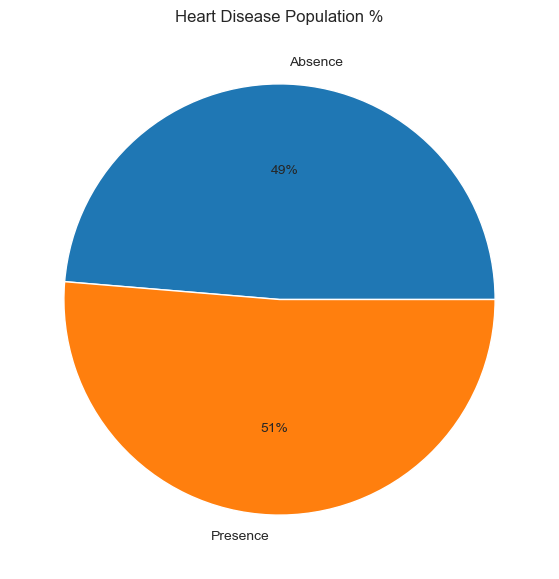

In [9]:
#pie chart of heart disease population % using matplotlib
fig = plt.figure(figsize=(10, 7))
plt.pie(hd,labels=['Absence','Presence'],autopct='%0.0f%%')
plt.title('Heart Disease Population %')
plt.show()

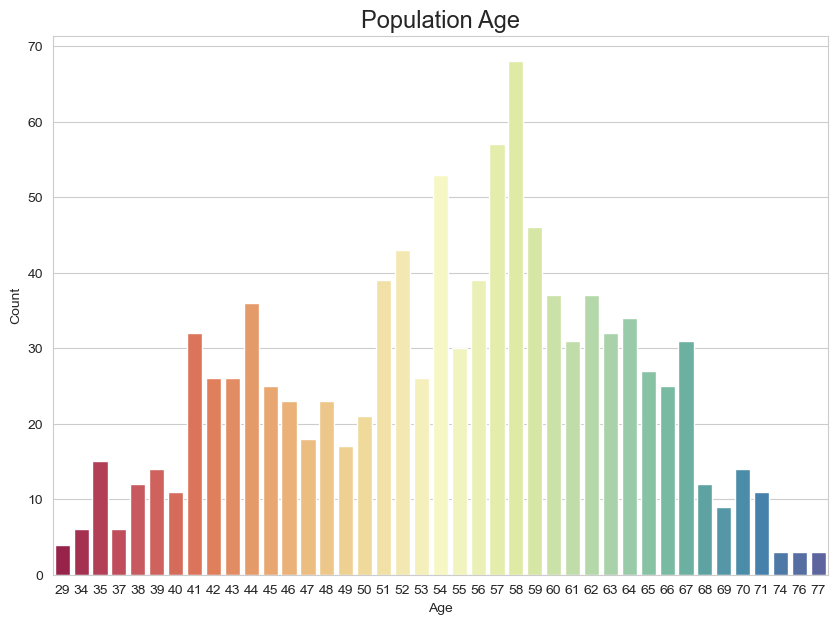

In [10]:
plt.figure(figsize=(10, 7))
sns.countplot(x='age',data=df,palette='Spectral')
plt.title('Population Age',fontsize=17)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [11]:
#statiscal analysis
min_age = df['age'].min()
max_age = df['age'].max()
mean_age= df['age'].mean()
print('Minimum age:',min_age)
print('Maximum age:',max_age)
print('Mean age:',mean_age)

Minimum age: 29
Maximum age: 77
Mean age: 54.43414634146342


In [12]:
#categorical analytics
young_age = df[(df['age']>29) & (df['age']<40)]
middle_age = df[(df['age']>=40) & (df['age']<55)]
elder_age = df[(df['age']>55)]
print('Young age:',len(young_age))
print('Middle age:',len(middle_age))
print('Ederly age:',len(elder_age))

Young age: 53
Middle age: 419
Ederly age: 519


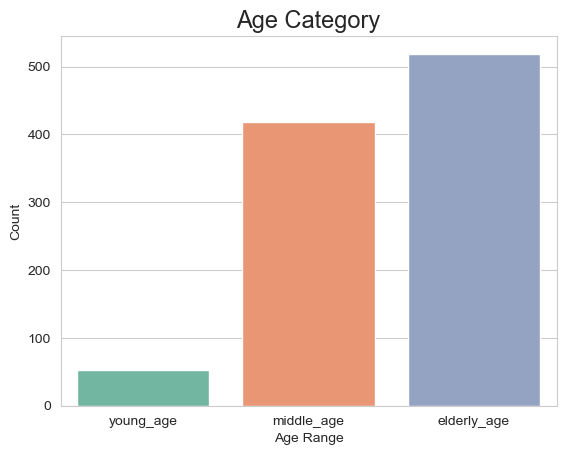

In [13]:
# bar plot of age category
sns.barplot(x=['young_age','middle_age','elderly_age'],y=[len(young_age),len(middle_age),len(elder_age)],palette='Set2')
plt.title('Age Category',fontsize=17)
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.show()

In [14]:
#converting numerical data into categorical data
def gender(row):
    if row==1:
        return 'Male'
    else:
        return 'Female'

In [15]:
# add new column sex1
df['sex1'] = df['sex'].apply(gender)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,sex1
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence,Female


In [16]:
#converting numerical into categorical data
def age_range(row):
    if row>=29 and row<40:
        return 'Young age'
    elif row>=40 and row<55:
        return 'Middle age'
    elif row>55:
        return 'Elder age'

In [17]:
#add new column in dataset age_range
df['Age_Range'] = df['age'].apply(age_range)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,sex1,Age_Range
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence,Male,Middle age
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence,Male,Middle age
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence,Male,Elder age
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence,Male,Elder age
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence,Female,Elder age


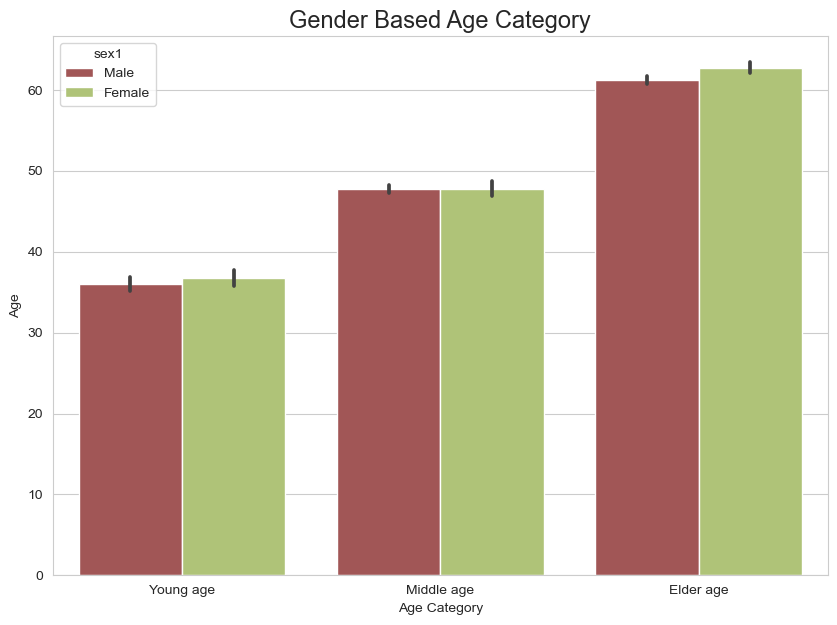

In [18]:
# histogram plot of gender based age category
plt.figure(figsize=(10, 7))
sns.barplot(x='Age_Range', y='age', hue='sex1', data=df, order=['Young age', 'Middle age', 'Elder age'], palette='tab20b_r')
plt.title('Gender Based Age Category', fontsize=17)
plt.xlabel('Age Category')
plt.ylabel('Age')
plt.show()

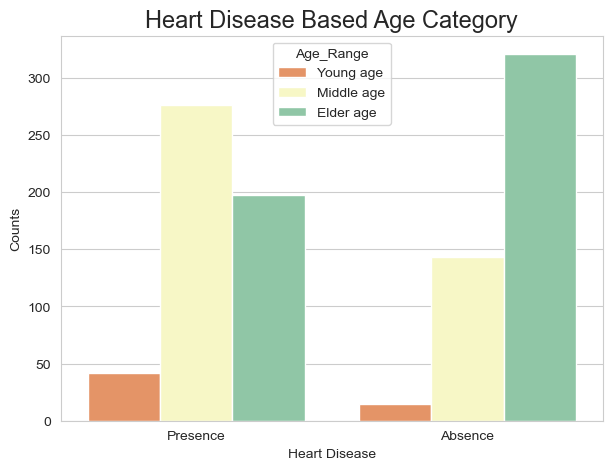

In [19]:
# count plot of heart disease based age category
plt.figure(figsize=(7,5))
hue_order = ['Young age', 'Middle age', 'Elder age']
sns.countplot(x='Heart_Disease',hue='Age_Range',data=df,order=['Presence','Absence'],hue_order=hue_order,palette='Spectral')
plt.title('Heart Disease Based Age Category', fontsize=17)
plt.xlabel('Heart Disease')
plt.ylabel('Counts')
plt.show()

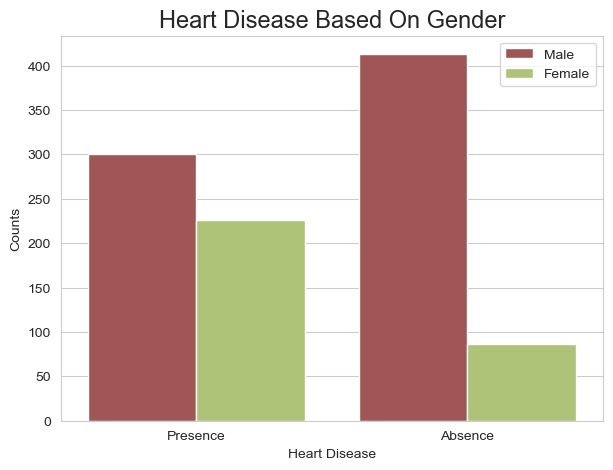

In [20]:
# count plot of heart disease based Gender
plt.figure(figsize=(7,5))
sns.countplot(x=df['Heart_Disease'],hue='sex1',data=df,order =['Presence','Absence'],palette='tab20b_r')
plt.title('Heart Disease Based On Gender', fontsize=17)
plt.xlabel('Heart Disease')
plt.ylabel('Counts')
plt.legend(labels=['Male','Female'])
plt.show()

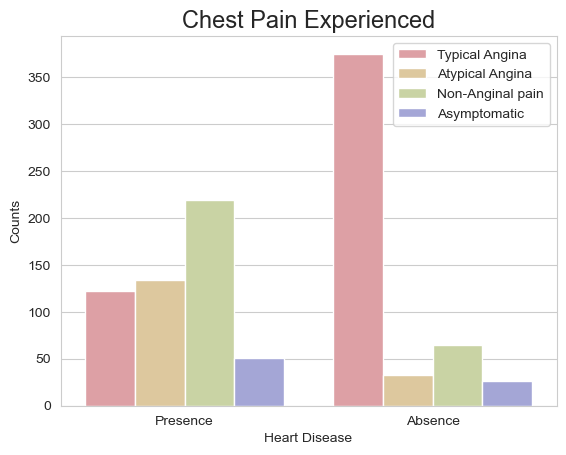

In [21]:
# count plot of chest pain experienced 
sns.countplot(x=df['Heart_Disease'],hue='cp',data=df,order =['Presence','Absence'],palette='tab20b_r')
plt.title('Chest Pain Experienced', fontsize=17)
plt.xlabel('Heart Disease')
plt.ylabel('Counts')
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

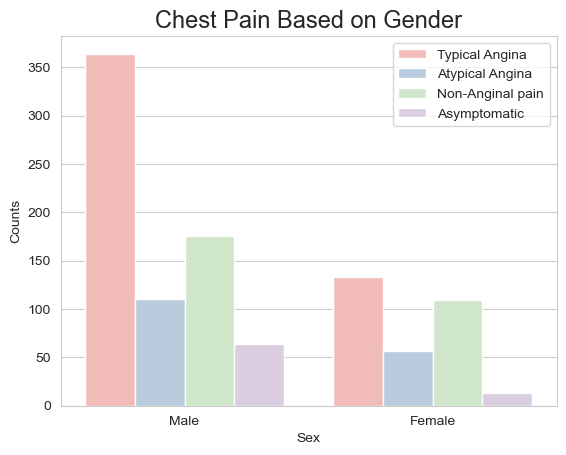

In [22]:
# count plot of chest pain based on gender
sns.countplot(x=df['sex1'],hue='cp',data=df,palette='Pastel1')
plt.title('Chest Pain Based on Gender', fontsize=17)
plt.xlabel('Sex')
plt.ylabel('Counts')
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

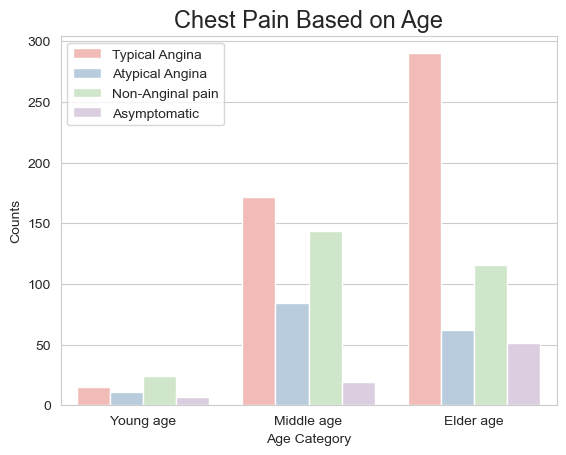

In [23]:
# count plot of chest pain based on age
sns.countplot(x=df['Age_Range'],hue='cp',data=df,order=['Young age', 'Middle age', 'Elder age'],palette='Pastel1')
plt.title('Chest Pain Based on Age', fontsize=17)
plt.xlabel('Age Category')
plt.ylabel('Counts')
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

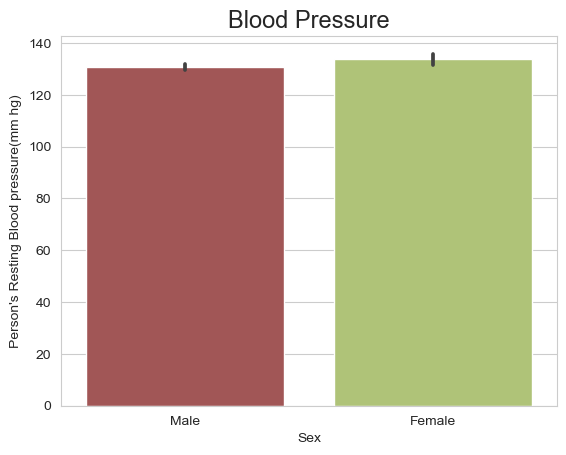

In [24]:
# bar plot of person's resting blood pressure
sns.barplot(x='sex1',y= 'trestbps',data=df,palette='tab20b_r')
plt.title('Blood Pressure', fontsize=17)
plt.xlabel('Sex')
plt.ylabel("Person's Resting Blood pressure(mm hg)")
plt.show()

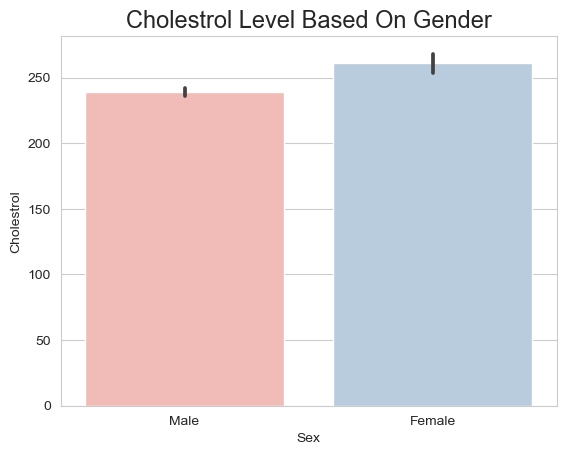

In [25]:
# bar plot of cholestrol level based on gender
sns.barplot(x='sex1',y= 'chol',data=df,palette='Pastel1')
plt.title('Cholestrol Level Based On Gender', fontsize=17)
plt.xlabel('Sex')
plt.ylabel('Cholestrol')
plt.show()

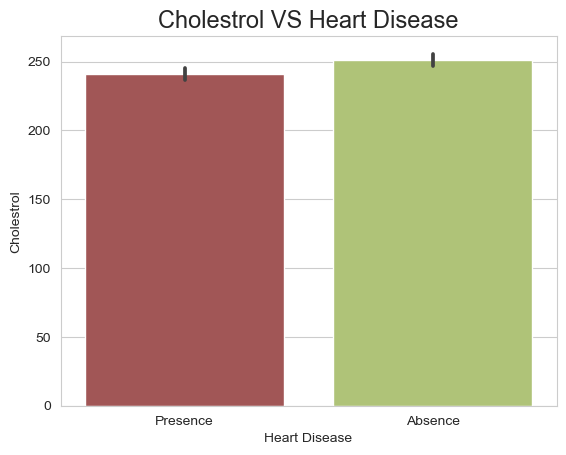

In [26]:
# bar plot of cholestrol vs heart disease
sns.barplot(x='Heart_Disease',y= 'chol',data=df,order =['Presence','Absence'],palette='tab20b_r')
plt.title('Cholestrol VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease')
plt.ylabel('Cholestrol')
plt.show()

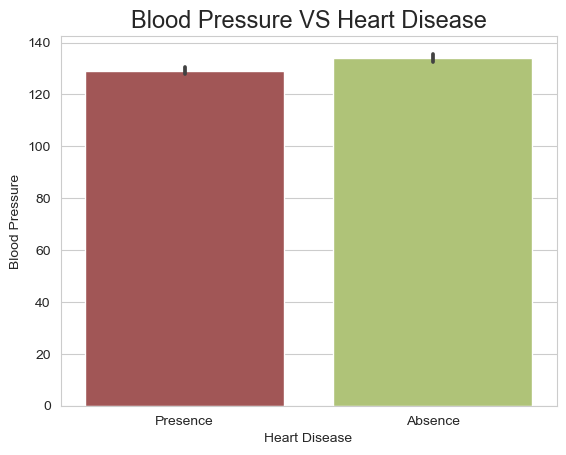

In [27]:
# bar plot of blood pressure vs heart disease
sns.barplot(x='Heart_Disease',y= 'trestbps',data=df,order =['Presence','Absence'],palette='tab20b_r')
plt.title('Blood Pressure VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease')
plt.ylabel('Blood Pressure')
plt.show()

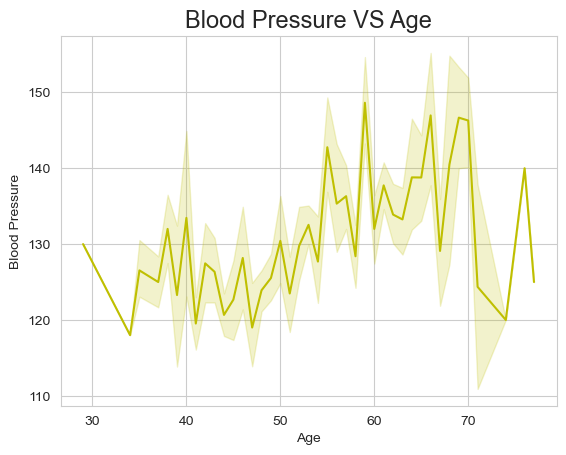

In [28]:
#line plot of blood pressure vs age
sns.lineplot(x='age',y= 'trestbps',data=df,color = 'y')
plt.title('Blood Pressure VS Age', fontsize=17)
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.show()

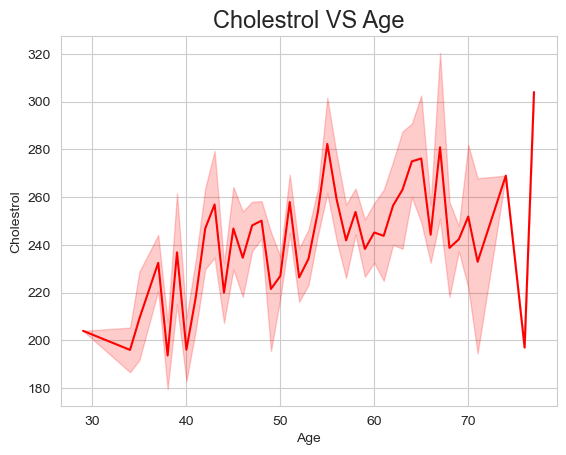

In [29]:
#line plot of cholestrol vs age
sns.lineplot(x='age',y= 'chol',data=df,color = 'r')
plt.title('Cholestrol VS Age', fontsize=17)
plt.xlabel('Age')
plt.ylabel('Cholestrol')
plt.show()

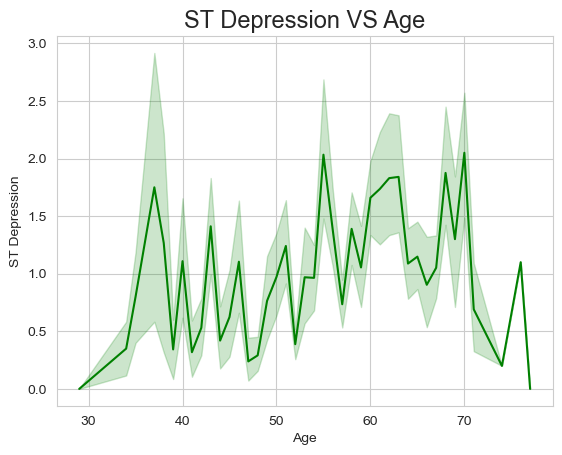

In [30]:
#line plot of ST Depression vs age
sns.lineplot(x='age',y= 'oldpeak',data=df,color = 'g')
plt.title('ST Depression VS Age', fontsize=17)
plt.xlabel('Age')
plt.ylabel('ST Depression')
plt.show()

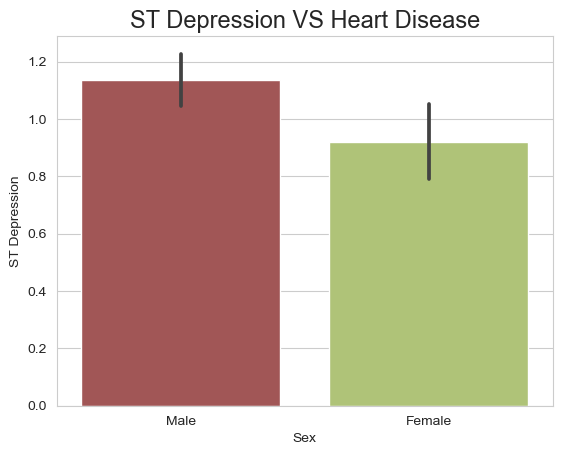

In [31]:
#bar plot of ST Depression vs Heart Disease
sns.barplot(x='sex1',y= 'oldpeak',data=df,palette='tab20b_r')
plt.title('ST Depression VS Heart Disease', fontsize=17)
plt.xlabel('Sex')
plt.ylabel('ST Depression')
plt.show()

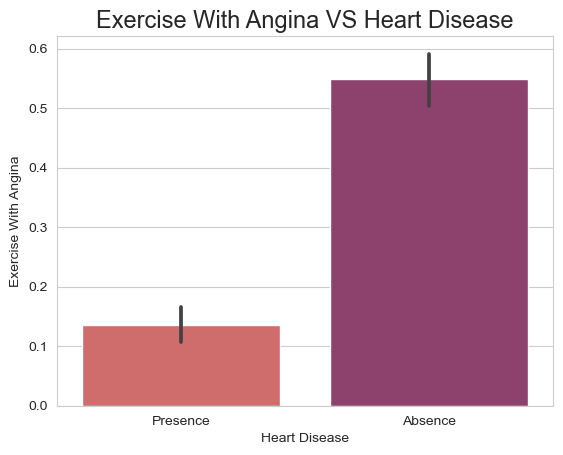

In [32]:
#bar plot of Angina vs Heart Disease
sns.barplot(x='Heart_Disease',y= 'exang',data=df,order =['Presence','Absence'],palette='flare')
plt.title('Exercise With Angina VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease')
plt.ylabel('Exercise With Angina')
plt.show()

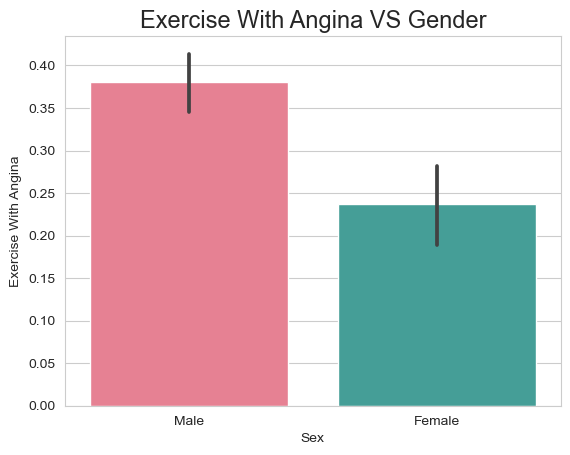

In [33]:
#bar plot of Angina vs Gender
sns.barplot(x='sex1',y= 'exang',data=df,palette='husl')
plt.title('Exercise With Angina VS Gender', fontsize=17)
plt.xlabel('Sex')
plt.ylabel('Exercise With Angina')
plt.show()

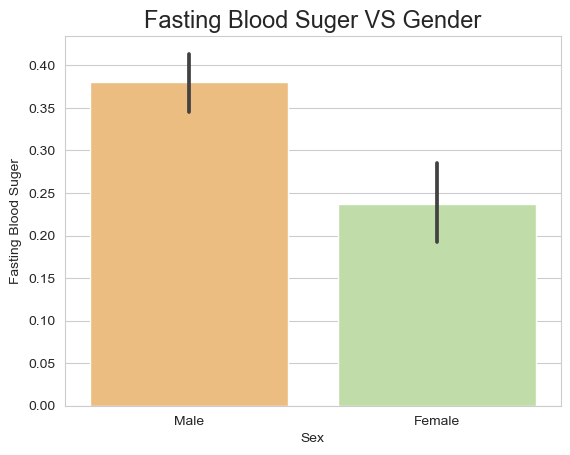

In [34]:
#bar plot of Fasting blood suger vs Gender
sns.barplot(x='sex1',y= 'exang',data=df,palette='Spectral')
plt.title('Fasting Blood Suger VS Gender', fontsize=17)
plt.xlabel('Sex')
plt.ylabel('Fasting Blood Suger')
plt.show()

C:\Users\riya\AppData\Local\Temp\ipykernel_9888\3235088969.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linewidth=3)


<Axes: >

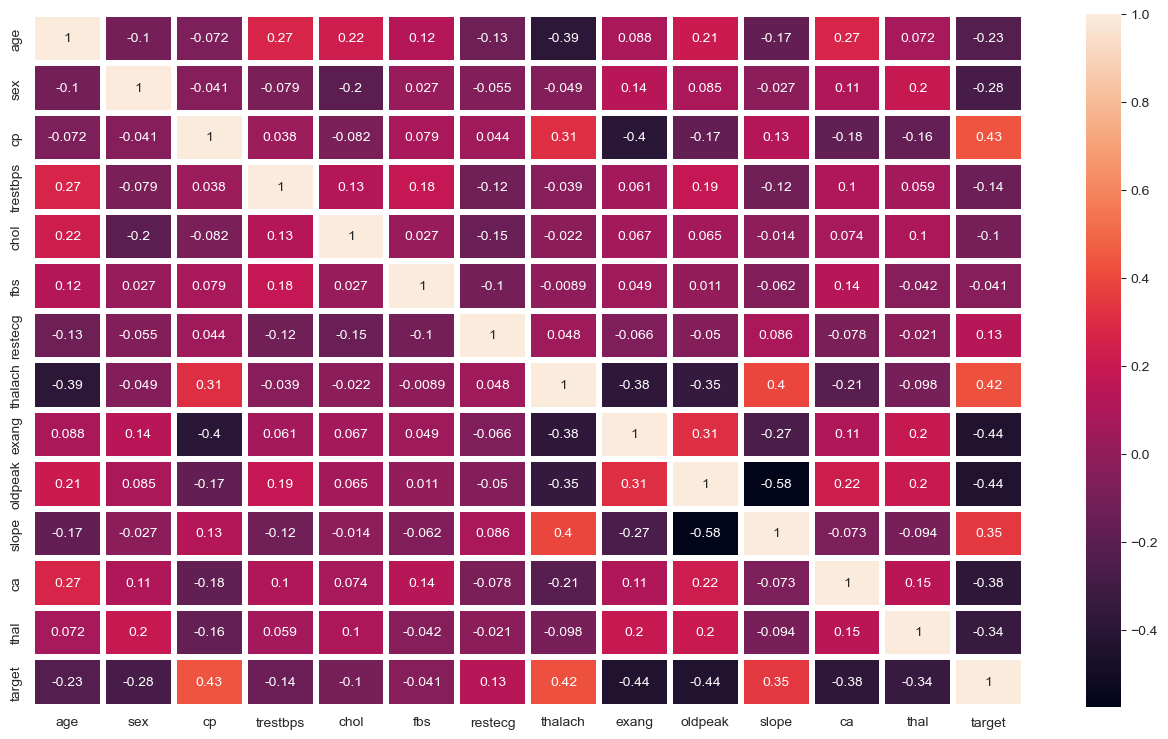

In [35]:
#heatmap using seaborn
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True,linewidth=3)

In [ ]:
# feature Engineering

In [9]:
# split the data into features and target
X = df.drop('target',axis=1)
y = df['target']

#scale the feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Model Buliding

In [13]:
#split the data into train test sets
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25)

In [14]:
#Train logistic Model
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# Evaluation and interpretation

In [15]:
#make prediction
y_pred = model.predict(X_test)

#evalute the model
print("Accuracy:",accuracy_score(y_test,y_pred))
print("confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.8365758754863813
confusion Matrix:
 [[ 95  32]
 [ 10 120]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.75      0.82       127
           1       0.79      0.92      0.85       130

    accuracy                           0.84       257
   macro avg       0.85      0.84      0.84       257
weighted avg       0.85      0.84      0.84       257



In [36]:
df.to_csv("Heart Disease data.csv", index=False) 